<a href="https://colab.research.google.com/github/Alicia-Mariyam/alicia-portfolio/blob/main/IPL_classifiaction_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split,  cross_val_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import lightgbm as lgbm
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, accuracy_score
#import pickle

In [ ]:
iplmatches = pd.read_csv('/content/IPL_Matches_2022 (1).csv')
ipldelivery=pd.read_csv('/content/IPL_Ball_by_Ball_2022 (1).csv')

In [ ]:
iplmatches.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [ ]:
iplmatches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [ ]:
iplmatches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
ipldelivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [ ]:
ipldelivery.head(30)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


Grouping the batsmen

In [ ]:
batsman_grp = ipldelivery.groupby(["ID", "innings", "BattingTeam", "batter",])
batsmen = batsman_grp["batsman_run"].sum().reset_index()
batsmen

,ID,innings,BattingTeam,batter,batsman_run
0,1304047,1,Chennai Super Kings,AT Rayudu,15
1,1304047,1,Chennai Super Kings,DP Conway,3
2,1304047,1,Chennai Super Kings,MS Dhoni,50
3,1304047,1,Chennai Super Kings,RA Jadeja,26
4,1304047,1,Chennai Super Kings,RD Gaikwad,0
...,...,...,...,...,...
1153,1312200,2,Gujarat Titans,DA Miller,32
1154,1312200,2,Gujarat Titans,HH Pandya,34
1155,1312200,2,Gujarat Titans,MS Wade,8
1156,1312200,2,Gujarat Titans,Shubman Gill,45


In [ ]:
balls = ipldelivery.groupby(["ID", "innings", "batter",])
balls_faced = balls["ballnumber",].count().reset_index()
balls_faced.rename(columns = {'ballnumber':'ballsfaced'}, inplace = True)
balls_faced

,ID,innings,batter,ballsfaced
0,1304047,1,AT Rayudu,17
1,1304047,1,DP Conway,8
2,1304047,1,MS Dhoni,38
3,1304047,1,RA Jadeja,29
4,1304047,1,RD Gaikwad,5
...,...,...,...,...
1153,1312200,2,DA Miller,20
1154,1312200,2,HH Pandya,32
1155,1312200,2,MS Wade,11
1156,1312200,2,Shubman Gill,43


In [ ]:
ipldelivery.isnull().sum()

ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           16862
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           17000
kind                 17000
fielders_involved    17208
BattingTeam              0
dtype: int64

In [ ]:
ipldelivery

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,1304047,2,17,5,SS Iyer,DJ Bravo,SP Jackson,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17908,1304047,2,17,6,SP Jackson,DJ Bravo,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17909,1304047,2,18,1,SP Jackson,AF Milne,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17910,1304047,2,18,2,SS Iyer,AF Milne,SP Jackson,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [ ]:
balls = ipldelivery.groupby(["ID", "innings", "batter",])
balls_faced = balls["ballnumber",].count().reset_index()
balls_faced.rename(columns = {'ballnumber':'ballsfaced'}, inplace = True)
batsmen = batsmen.merge(balls_faced, left_on=["ID", "innings", "batter"],
                        right_on=["ID", "innings", "batter"], how="left")
fours = ipldelivery[ ipldelivery["batsman_run"] == 4]
sixes = ipldelivery[ ipldelivery["batsman_run"] == 6]


fours_per_batsman = fours.groupby(["ID", "innings", "batter"])["batsman_run"].count().reset_index()
sixes_per_batsman = sixes.groupby(["ID", "innings", "batter"])["batsman_run"].count().reset_index()

fours_per_batsman.columns = ["ID", "innings", "batter", "fours"]
sixes_per_batsman.columns = ["ID", "innings", "batter", "sixes"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["ID", "innings", "batter"],
                        right_on=["ID", "innings", "batter"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["ID", "innings", "batter"],
                        right_on=["ID", "innings", "batter"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_run'] / balls_faced['ballsfaced'] * 100, 2)

dismissals = ipldelivery[ pd.notnull(ipldelivery["isWicketDelivery"])]
dismissals = dismissals[["ID", "innings", "isWicketDelivery", "kind", "fielders_involved"]]
dismissals.rename(columns={"isWicketDelivery": "batter"}, inplace=True)
batsmen

,ID,innings,BattingTeam,batter,batsman_run,ballsfaced,fours,sixes,SR
0,1304047,1,Chennai Super Kings,AT Rayudu,15,17,1.00,1.00,88.24
1,1304047,1,Chennai Super Kings,DP Conway,3,8,NaN,NaN,37.50
2,1304047,1,Chennai Super Kings,MS Dhoni,50,38,7.00,1.00,131.58
3,1304047,1,Chennai Super Kings,RA Jadeja,26,29,NaN,1.00,89.66
4,1304047,1,Chennai Super Kings,RD Gaikwad,0,5,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...
1153,1312200,2,Gujarat Titans,DA Miller,32,20,3.00,1.00,160.00
1154,1312200,2,Gujarat Titans,HH Pandya,34,32,3.00,1.00,106.25
1155,1312200,2,Gujarat Titans,MS Wade,8,11,NaN,1.00,72.73
1156,1312200,2,Gujarat Titans,Shubman Gill,45,43,3.00,1.00,104.65


In [ ]:
iplmatches.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [ ]:
batsmen.merge(iplmatches[["MatchNumber","ID"]],on = 'ID',)

,ID,innings,BattingTeam,batter,batsman_run,ballsfaced,fours,sixes,SR,MatchNumber
0,1304047,1,Chennai Super Kings,AT Rayudu,15,17,1.00,1.00,88.24,1
1,1304047,1,Chennai Super Kings,DP Conway,3,8,NaN,NaN,37.50,1
2,1304047,1,Chennai Super Kings,MS Dhoni,50,38,7.00,1.00,131.58,1
3,1304047,1,Chennai Super Kings,RA Jadeja,26,29,NaN,1.00,89.66,1
4,1304047,1,Chennai Super Kings,RD Gaikwad,0,5,NaN,NaN,0.00,1
...,...,...,...,...,...,...,...,...,...,...
1153,1312200,2,Gujarat Titans,DA Miller,32,20,3.00,1.00,160.00,Final
1154,1312200,2,Gujarat Titans,HH Pandya,34,32,3.00,1.00,106.25,Final
1155,1312200,2,Gujarat Titans,MS Wade,8,11,NaN,1.00,72.73,Final
1156,1312200,2,Gujarat Titans,Shubman Gill,45,43,3.00,1.00,104.65,Final


Grouping the bowler

In [ ]:
bowler_grp = ipldelivery.groupby(["ID", "innings","bowler","overs"])
bowlers = bowler_grp["extras_run","extra_type","total_run"].sum().reset_index()
bowlers=bowlers.merge(iplmatches[["MatchNumber","ID","Team2"]],on = 'ID',)
bowlers.rename(columns = {'Team2':'bowling_team'}, inplace = True)

In [ ]:
bowlers

,ID,innings,bowler,overs,extras_run,total_run,MatchNumber,bowling_team
0,1304047,1,AD Russell,10,0,4,1,Kolkata Knight Riders
1,1304047,1,AD Russell,12,0,2,1,Kolkata Knight Riders
2,1304047,1,AD Russell,17,0,14,1,Kolkata Knight Riders
3,1304047,1,AD Russell,19,0,18,1,Kolkata Knight Riders
4,1304047,1,CV Varun,5,0,6,1,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...
2876,1312200,2,TA Boult,12,1,7,Final,Gujarat Titans
2877,1312200,2,YS Chahal,5,0,6,Final,Gujarat Titans
2878,1312200,2,YS Chahal,7,0,3,Final,Gujarat Titans
2879,1312200,2,YS Chahal,9,0,6,Final,Gujarat Titans


Data visualisations

<Axes: ylabel='batter'>

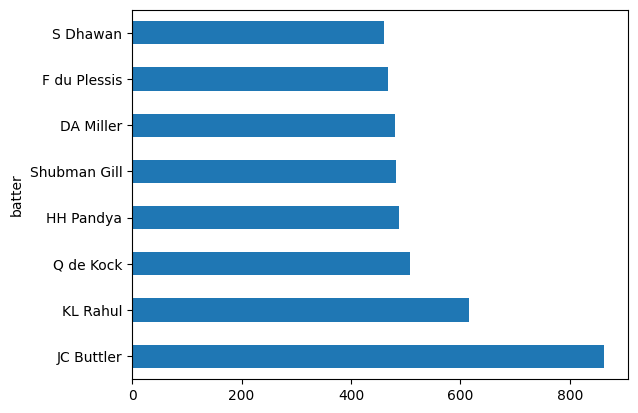

In [ ]:
runs_scored=batsmen.groupby(['batter'])["batsman_run"].sum()
runs_scored=runs_scored.sort_values(ascending=False)
top10runs = runs_scored.head(8)
top10runs.plot(kind='barh')

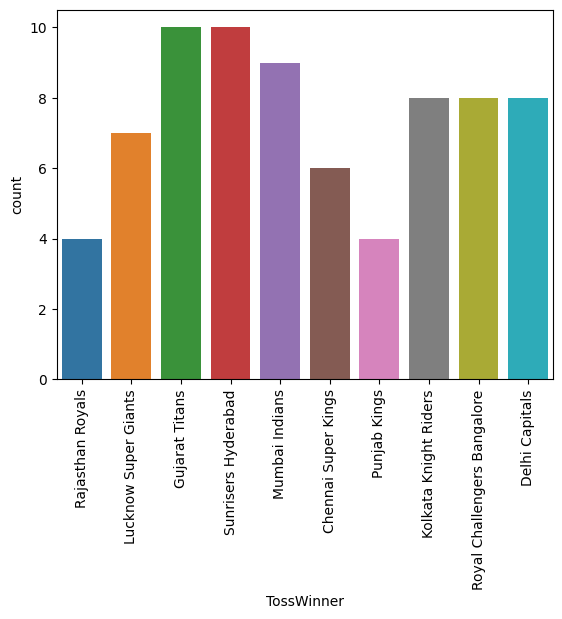

In [ ]:
sns.countplot(x = 'TossWinner', data = iplmatches)
plt.xticks(rotation='vertical')
plt.show()

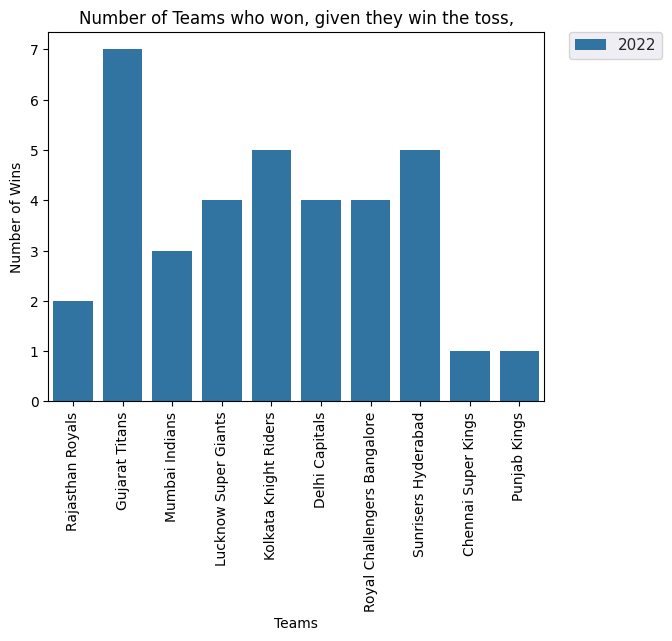

In [ ]:
winneroftoss = iplmatches[(iplmatches['TossWinner']) == (iplmatches['WinningTeam'])]

wot = sns.countplot( x = 'WinningTeam', hue='Season', data=winneroftoss)
sns.set(rc={'figure.figsize':(8,6)})
plt.xticks(rotation = 'vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.title("Number of Teams who won, given they win the toss,")
plt.show(wot)

In [ ]:
df= pd.merge(iplmatches, ipldelivery, how="right", on="ID")

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
l1 = preprocessing.LabelEncoder()
df.City  = l1.fit_transform(df.City )
df.Team1 = l1.fit_transform(df.Team1)
df.Team2 = l1.fit_transform(df.Team2)
df.Venue  = l1.fit_transform(df.Venue )
df.TossDecision= l1.fit_transform(df.TossDecision)
df.batter   = l1.fit_transform(df.batter )
df.bowler   = l1.fit_transform(df.bowler )
df.WinningTeam  = l1.fit_transform(df.WinningTeam )

In [ ]:
df.WinningTeam

<Axes: >

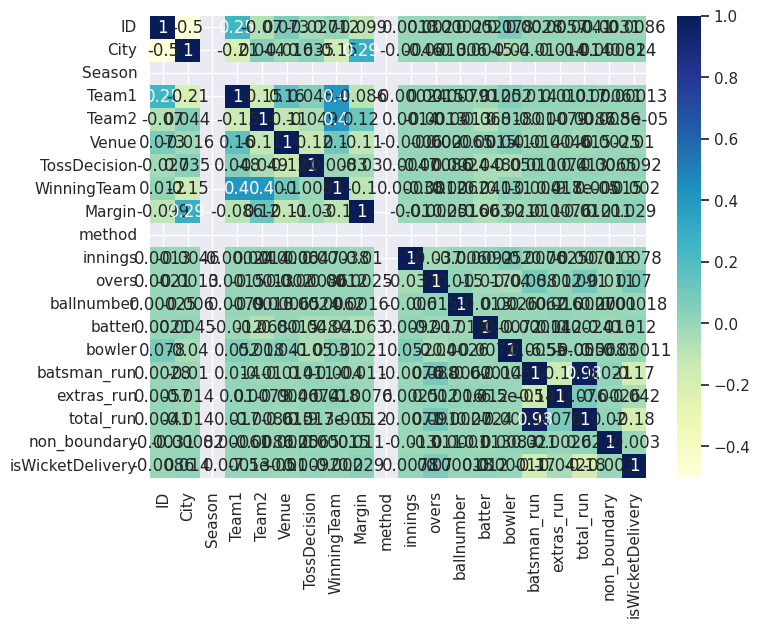

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Splitting the data

In [ ]:
X=df[["Team1","Team2","TossDecision","innings","overs","batter","bowler","batsman_run","extras_run","total_run"]]
y=df[["WinningTeam"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.preprocessing import RobustScaler
rsc=RobustScaler()
X_train=rsc.fit_transform(X_train)
X_test=rsc.transform(X_test)

Upto here, all good

Using LazyPredicy

CLASSIFICATION-Prediction of Winning team

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings = True, custom_metric = None)
models,predictions =  clf.fit(X_train, X_test, y_train,y_test)

lpc= pd.DataFrame.from_dict(models)
lpc

100%|██████████| 29/29 [02:01<00:00,  4.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,None,0.99,1.90
XGBClassifier,0.99,0.99,None,0.99,9.41
DecisionTreeClassifier,0.99,0.98,None,0.99,0.07
BaggingClassifier,0.99,0.98,None,0.99,0.34
ExtraTreesClassifier,0.99,0.98,None,0.99,1.16
RandomForestClassifier,0.98,0.98,None,0.98,1.47
ExtraTreeClassifier,0.94,0.93,None,0.94,0.04
LabelSpreading,0.83,0.82,None,0.83,25.13
LabelPropagation,0.83,0.82,None,0.83,13.07


In [ ]:
import lightgbm as lgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#Table to record metrics of various models
Cmetrics=pd.DataFrame()
CModel=[]
CAccuracy=[]
Crmse=[]
Cmae=[]
Cr2=[]
Cpredictions=[]

In [ ]:
def predict1(C_model):
    model= C_model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    Cpredictions.append = model.predict(X_test)
    algoname= C_model.__class__.__name__
    CModel.append(C_model)
    CAccuracy.append(round(accuracy_score(y_test, predictions)),3)
    Crmse.append(round(np.sqrt(mean_squared_error(y_test, predictions)),3))
    Cmae.append(round(mean_absolute_error(y_test, predictions),3))
    Cr2.append(round(r2_score(y_test, predictions),3))


    plt.title(algoname," - y predicted and y actual")
    ax1=sns.distplot(y_test, hist=False)
    sns.distplot(predictions, hist=False, ax=ax1)
    plt.show()

    return algoname, round(accuracy_score(y_test, predictions),3), round(r2_score(y_test, predictions),3), round(mean_absolute_error(y_test, predictions),1), round(np.sqrt(mean_squared_error(y_test, predictions)),1)

Include the models having the best results in LazyPredict

In [ ]:
algo=[RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier(), lgbm.LGBMClassifier(), svm.SVC(kernel='rbf'), KNeighborsClassifier(), LogisticRegression() ]
score=[]
for a in algo:
    score.append(predict1(a))

Cmetrics['Model'] = CModel
Cmetrics['Score'] = CAccuracy
Cmetrics['r2 score'] = Cr2
Cmetrics['MAE'] = Cmae
Cmetrics['RMSE'] = Crmse

AttributeError: ignored

Feature selection(See if implementable)

In [ ]:
# select = SelectKBest(score_func=chi2, k=3)
# z = select.fit_transform(x,y)
# print("After selecting best 3 features:", z.shape)

# filter = select.get_support()
# features = array(iris.feature_names)

# print("All features:")
# print(features)

# print("Selected best 3:")
# print(features[filter])
# print(z)

ENSEMBLING (Voting)

In [ ]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgbc = XGBClassifier()
lgbmc = lgbm.LGBMClassifier()
svmc = svm.SVC(kernel='rbf')
knc = KNeighborsClassifier()
logc = LogisticRegression()

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators=[('knc', KNeighborsClassifier()), ('svmc', svm.SVC()), ('logc', LogisticRegression()), ('dtc',DecisionTreeClassifier()),('rfc',RandomForestClassifier()), ('xgbc',XGBClassifier()),('lgbmc',lgbm.LGBMClassifier())]
ensemble = VotingClassifier(estimators, voting='hard')

# model_results = list()
# models = models_all()
# names = list()

In [ ]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.9868825006977393

In [ ]:
Cpredict=ensemble.predict(X_test)

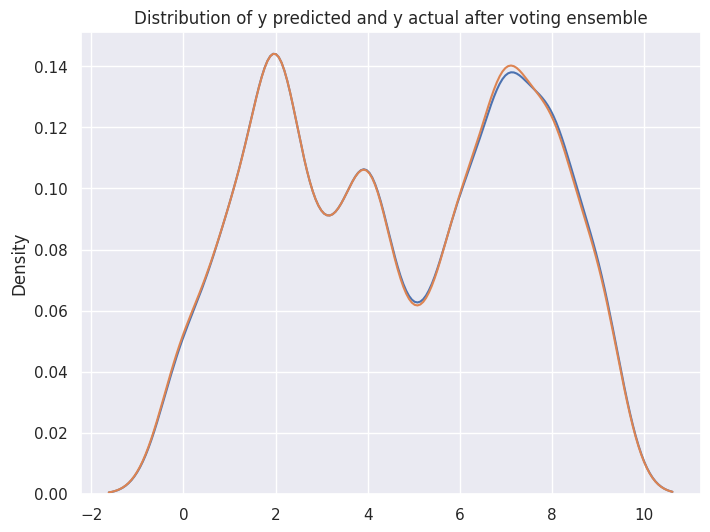

In [ ]:
plt.title("Distribution of y predicted and y actual after voting ensemble")
ax1=sns.distplot(y_test, hist=False)
sns.distplot(Cpredict, hist=False, ax=ax1)
plt.show()

Uptill here good

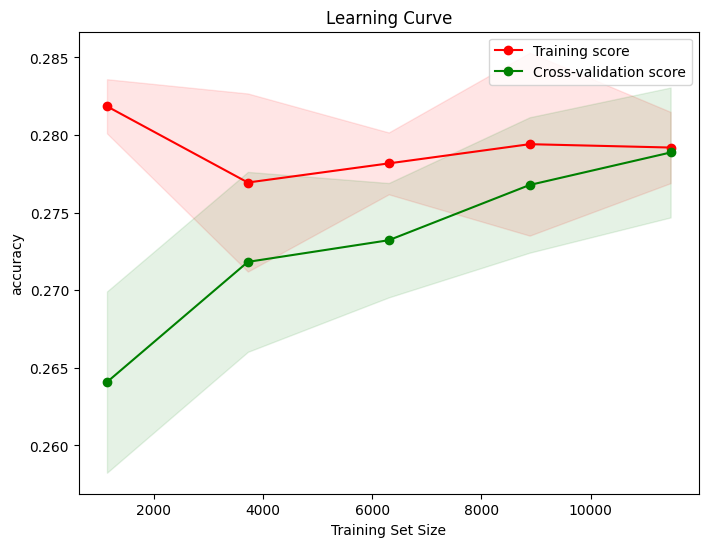

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, scoring_metric):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring_metric)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring_metric)
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

# Usage example
# estimator: your machine learning model
# X: your feature matrix
# y: your target vector
# cv: your cross-validation strategy (e.g., KFold or StratifiedKFold)
# scoring_metric: the evaluation metric to use (e.g., accuracy, precision, recall, etc.)

# Assuming you have imported and prepared your data into X and y

# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize your machine learning model
estimator = LogisticRegression()

# Plot the learning curves
plot_learning_curve(estimator, X_train, y_train, cv=5, scoring_metric='accuracy')

ENSEMBLING (Stacking)(See if implementable)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# def create_stacking_models():
#     base_models = list()
#     base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y))
#                                                      , weights = 'distance')
#                        ))
#     base_models.append(('SVC', SVC(kernel = 'linear'
#                                    , class_weight = 'balanced'
#                                   , break_ties = True)
#                        ))
#     base_models.append(('GNB', GaussianNB()))
#     base_models.append(('RF', RandomForestClassifier(n_estimators= 200,
#                                                    oob_score = True,
#                                                    class_weight = "balanced",
#                                                    random_state = 20,
#                                                    ccp_alpha = 0.1)
#                        ))


#     meta_model = LogisticRegression()
#     final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
#                                      final_estimator = meta_model,
#                                      cv = 5
#                                     )
#     return final_model

# def models_all():
#     all_models = dict()
#     all_models['KNNC']= KNeighborsClassifier(n_neighbors = len(np.unique(y))
#                                              , weights = 'distance')
#     all_models['SVC']= SVC(kernel = 'linear'
#                            , class_weight = 'balanced'
#                           , break_ties = True
#                           )
#     all_models['RF']= RandomForestClassifier(n_estimators= 200,
#                                                    oob_score = True,
#                                                    class_weight = "balanced",
#                                                    random_state = 20,
#                                                    ccp_alpha = 0.15)
#     all_models['GNB'] = GaussianNB()
#     all_models['Stacking'] = create_stacking_models()
#     return all_models

# def evaluate_model(model):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
#     scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, error_score='raise')
#     return scores

# model_results = list()
# models = models_all()
# names = list()

# # Create a for loop that iterates over each name, model in models dictionary
# for name, model in models.items():
#     scores = evaluate_model(model)
#     model_results.append(scores)
#     names.append(name)
# #     print(model_results)
#     print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

# plt.figure(figsize=(15,5))
# fig = sns.boxplot(x=names, y=model_results, showmeans=True)
# # plt.xlabel(list(names))
# # plt.ylabel(list(model_results))
# plt.title("Model Comparisions")
# plt.show(fig)



REGRESSION- Score Prediction (Do for models with highest scores under lazy predict)

LazyPredict

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings = True, custom_metric = None)
models,predictions =  reg.fit(X_train, X_test, y_train,y_test)
lpr= pd.DataFrame.from_dict(models)
lpr

 71%|███████▏  | 30/42 [03:32<00:46,  3.91s/it]

Linear Regression

In [ ]:
#Table to record metrics of various models
Rmetrics=pd.DataFrame()
RModel=[]
Rrmse=[]
Rmae=[]
Rr2=[]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xg
import lightgbm as lgbm
model = LinearRegression()

Regression scores of the models

In [ ]:
def boost_models(x):
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    RModel.append(x)
    Rrmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
    Rmae.append(round(mean_absolute_error(y_test, yhat),3))
    Rr2.append(round(r2_score(y_test, yhat),3))

    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),1), round(np.sqrt(mean_squared_error(y_test, yhat)),1)


In [ ]:
algo=[LinearRegression(), DecisionTreeRegressor(), GradientBoostingRegressor(), lgbm.LGBMRegressor(), XGBRegressor(), RandomForestRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))
print("Scores before feature engineering")
pd.DataFrame(score, columns=['Model', 'R2score','MAE', 'RMSE'])

Scores before feature engineering


,Model,R2score,MAE,RMSE
0,LinearRegression,0.18,2.00,2.50
1,DecisionTreeRegressor,0.95,0.10,0.60
2,GradientBoostingRegressor,0.67,1.00,1.60
3,LGBMRegressor,0.93,0.20,0.70
4,XGBRegressor,0.97,0.10,0.50
5,RandomForestRegressor,0.96,0.10,0.50


Feature Engineering for regression (try changing value of k)
(Look into recursive feature elimination)

In [ ]:
Feature_X=df[["Team1","Team2","TossDecision","innings","overs","batter","bowler","batsman_run","extras_run","total_run"]]
Feature_y=df[["WinningTeam"]]

In [ ]:
df1=df

In [ ]:
#using recursive feature elimination to find 8 estimators in this case

# from sklearn.feature_selection import RFE
# from sklearn.ensemble import AdaBoostRegressor
# from numpy import array

# estimator = AdaBoostRegressor(random_state=0, n_estimators=100)
# selector = RFE(estimator, n_features_to_select=25, step=1)
# selector = selector.fit(Feature_X, Feature_y)
# filter = selector.support_
# ranking = selector.ranking_
# print("Mask data: ", filter)
# print("Ranking: ", ranking)

# features = array(df1.feature_names)
# print("Selected features:")
# print(features[filter])

Mask data:  [ True  True  True False False  True  True  True  True  True]
Ranking:  [1 1 1 3 2 1 1 1 1 1]


AttributeError: ignored

In [ ]:
KBest = SelectKBest(f_regression, k=10)
KBest.fit(Feature_X,Feature_y)
cols = KBest.get_support(indices=True)
features_df_new = Feature_X.iloc[:,cols]
features_df_new[0:2]

,Team1,Team2,TossDecision,innings,overs,batter,bowler,batsman_run,extras_run,total_run
0,7,2,0,1,0,171,66,0,0,0
1,7,2,0,1,0,171,66,0,1,1


Code for using selected features as input

In [ ]:
from sklearn.model_selection import train_test_split
Reg_X_train,Reg_X_test,Reg_y_train,Reg_y_test = train_test_split(Feature_X,Feature_y, test_size=0.2, random_state=30)

Hypertuning for models with best scores

In [ ]:
Hmetrics=pd.DataFrame()
HModel=[]
Hscore=[]
Hrmse=[]
Hmae=[]
Hr2=[]

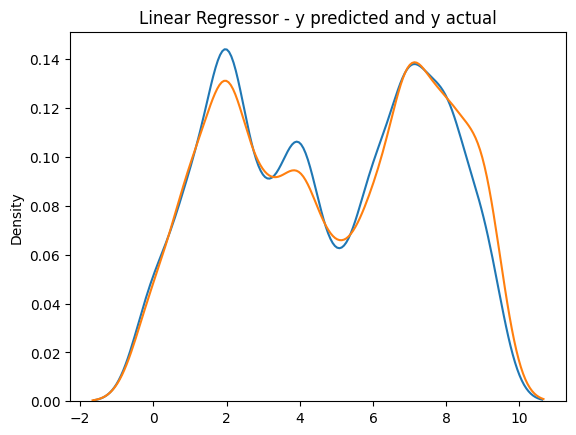

In [ ]:
model = LinearRegression()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
L_result=regr_trans.fit(Reg_X_train, Reg_y_train)
Reg_yhat = regr_trans.predict(Reg_X_test)
algoname= "Linear Regressor"
HModel.append(algoname)
Hrmse.append(round(np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat)),3))
Hmae.append(round(mean_absolute_error(Reg_y_test, Reg_yhat),3))
Hr2.append(round(r2_score(Reg_y_test, Reg_yhat),3))

#evaluate metrics
r2_score(Reg_y_test, Reg_yhat), mean_absolute_error(Reg_y_test, Reg_yhat), np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat))

plt.title("Linear Regressor - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_yhat, hist=False, ax=ax1)
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


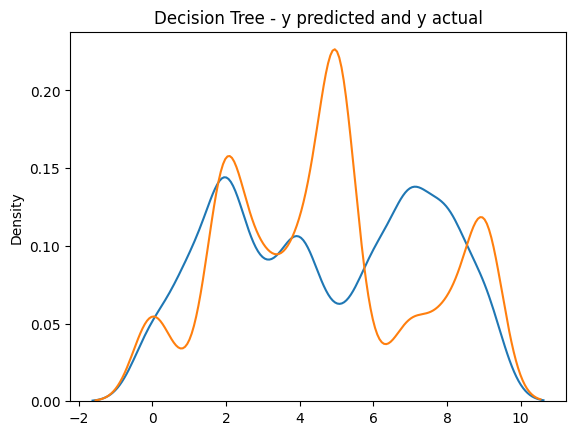

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search
grid_result=regr_trans.fit(Reg_X_train, Reg_y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = DecisionTreeRegressor(max_depth=best_params["max_depth"], min_samples_split=best_params["min_samples_split"], min_samples_leaf=best_params["min_samples_leaf"], max_features=best_params["max_features"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(Reg_X_train, Reg_y_train)
Reg_yhat = regr_trans.predict(Reg_X_test)
algoname= "DecisionTreeRegressor"
HModel.append(algoname)
Hrmse.append(round(np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat)),3))
Hmae.append(round(mean_absolute_error(Reg_y_test, Reg_yhat),3))
Hr2.append(round(r2_score(Reg_y_test, Reg_yhat),3))

#evaluate metrics
r2_score(Reg_y_test, Reg_yhat), mean_absolute_error(Reg_y_test, Reg_yhat), np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat))

plt.title("Decision Tree - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_yhat, hist=False, ax=ax1)
plt.show()

{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}


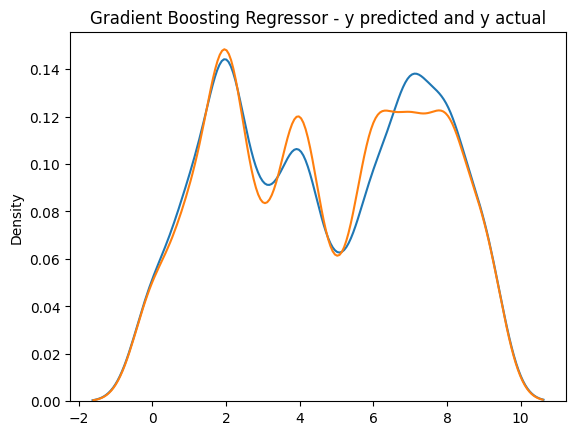

In [ ]:
param_grid = {'n_estimators': [100, 80, 60, 50, 45],
              'max_depth': [3, 4, 5, 6],
              'learning_rate' :[0.2, 0.15]
             }

grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 0, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search
grid_result=regr_trans.fit(Reg_X_train, Reg_y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(Reg_X_train, Reg_y_train)
Reg_yhat = regr_trans.predict(Reg_X_test)
algoname= "GradientBoostingRegressor"
HModel.append(algoname)
Hrmse.append(round(np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat)),3))
Hmae.append(round(mean_absolute_error(Reg_y_test, Reg_yhat),3))
Hr2.append(round(r2_score(Reg_y_test, Reg_yhat),3))

#evaluate metrics
r2_score(Reg_y_test, Reg_yhat), mean_absolute_error(Reg_y_test, Reg_yhat), np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat))

plt.title("Gradient Boosting Regressor - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_yhat, hist=False, ax=ax1)
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'max_depth': 6, 'n_estimators': 100, 'num_leaves': 12}


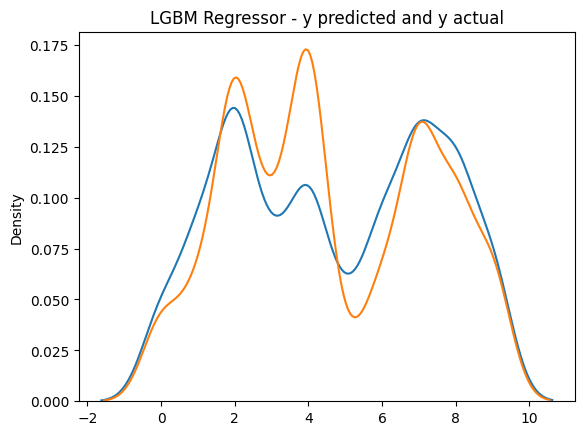

In [ ]:
param_grid = {'n_estimators': [100, 80, 60, 50, 45],
              'max_depth': [3, 4, 5, 6],
              'num_leaves' :[9, 10, 11, 12]
             }

grid = GridSearchCV(lgbm.LGBMRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search
grid_result=regr_trans.fit(Reg_X_train, Reg_y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = lgbm.LGBMRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], num_leaves=best_params["num_leaves"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(Reg_X_train, Reg_y_train)
Reg_yhat = regr_trans.predict(Reg_X_test)
algoname= "LGBMRegressor"
HModel.append(algoname)
#HScore.append(round(accuracy(Reg_y_test, Reg_yhat),3))
Hrmse.append(round(np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat)),3))
Hmae.append(round(mean_absolute_error(Reg_y_test, Reg_yhat),3))
Hr2.append(round(r2_score(Reg_y_test, Reg_yhat),3))

#evaluate metrics
r2_score(Reg_y_test, Reg_yhat), mean_absolute_error(Reg_y_test, Reg_yhat), np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat))

plt.title("LGBM Regressor - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_yhat, hist=False, ax=ax1)
plt.show()

{'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 0.2}


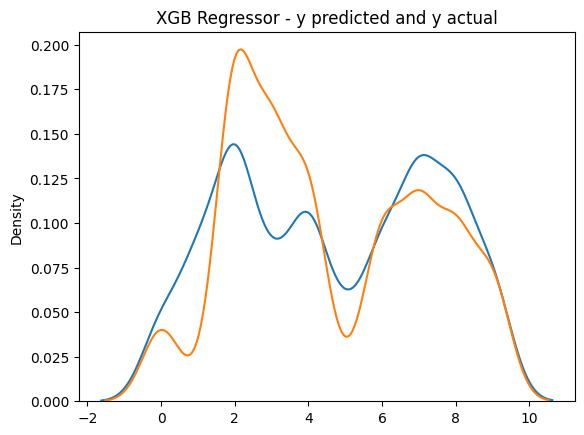

In [ ]:
param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }

grid = GridSearchCV(xg.XGBRegressor(), param_grid, refit = True,  n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search
grid_result=regr_trans.fit(Reg_X_train, Reg_y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(Reg_X_train, Reg_y_train)
Reg_yhat = regr_trans.predict(Reg_X_test)
algoname= "XGBRegressor"
HModel.append(algoname)
#HScore.append(round(accuracy(Reg_y_test, Reg_yhat),3))
Hrmse.append(round(np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat)),3))
Hmae.append(round(mean_absolute_error(Reg_y_test, Reg_yhat),3))
Hr2.append(round(r2_score(Reg_y_test, Reg_yhat),3))

#evaluate metrics
r2_score(Reg_y_test, Reg_yhat), mean_absolute_error(Reg_y_test, Reg_yhat), np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat))

plt.title("XGB Regressor - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_yhat, hist=False, ax=ax1)
plt.show()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'max_depth': None, 'n_estimators': 60}


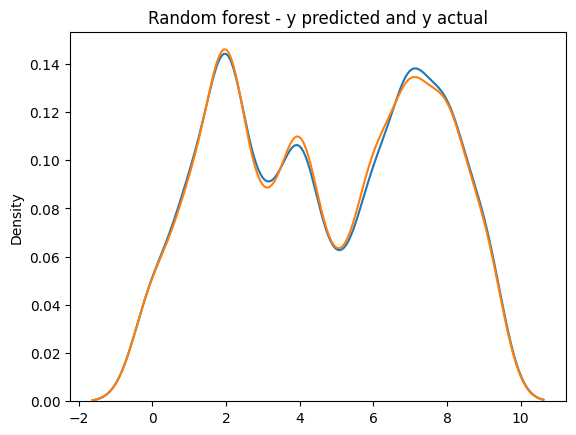

In [ ]:
param_grid = {'n_estimators': [100, 80, 60, 50, 45],
              'max_depth': [None, 3, 4, 5, 6]
             }

grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search
grid_result=regr_trans.fit(Reg_X_train, Reg_y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(Reg_X_train, Reg_y_train)
Reg_yhat = regr_trans.predict(Reg_X_test)
algoname= "RandomForestRegressor"
HModel.append(algoname)
#HScore.append(round(accuracy(Reg_y_test, Reg_yhat),3))
Hrmse.append(round(np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat)),3))
Hmae.append(round(mean_absolute_error(Reg_y_test, Reg_yhat),3))
Hr2.append(round(r2_score(Reg_y_test, Reg_yhat),3))

#evaluate metrics
r2_score(Reg_y_test, Reg_yhat), mean_absolute_error(Reg_y_test, Reg_yhat), np.sqrt(mean_squared_error(Reg_y_test, Reg_yhat))

plt.title("Random forest - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_yhat, hist=False, ax=ax1)
plt.show()

Linear regression does not have any hyper parameters that can be hypertuned

Insert acuracy

In [ ]:
Hmetrics['Model']=HModel
Hmetrics['rmse']=Hrmse
Hmetrics['mae']=Hmae
Hmetrics['r2']=Hr2
Hmetrics

,Model,rmse,mae,r2
0,Linear Regressor,2.52,2.01,0.17
1,DecisionTreeRegressor,2.34,1.65,0.29
2,GradientBoostingRegressor,0.52,0.13,0.96
3,LGBMRegressor,1.14,0.65,0.83
4,XGBRegressor,1.12,0.56,0.84
5,RandomForestRegressor,0.54,0.07,0.96


Ensemble-voting

In [ ]:
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
xgbr = XGBRegressor()
lgbmr = lgbm.LGBMRegressor()
gbc = GradientBoostingRegressor()
linr = LinearRegression()

In [ ]:
from math import sqrt
from sklearn.ensemble import VotingRegressor
rfr = RandomForestRegressor(max_depth= None, n_estimators=80)
dtr = DecisionTreeRegressor(max_depth=7, min_samples_split= 5, min_samples_leaf=1, max_features='sqrt')
xgbr = xg.XGBRFRegressor(max_depth=7, n_estimators=80, reg_lambda=0.25)
lgbmr = lgbm.LGBMRegressor(max_depth=6, n_estimators=100, num_leaves=12)
gbr = GradientBoostingRegressor(max_depth=6, n_estimators=100, learning_rate=0.15)
linr = LinearRegression()

# Create the ensemble by combining the individual regressors
ensemble = VotingRegressor(estimators=[('rfr', rfr), ('dtr', dtr), ('xgbr', xgbr),('lgbmr',lgbmr),('linr', linr),('gbr', gbr)])

# Fit the ensemble on the training data
ensemble.fit(Reg_X_train, Reg_y_train)

# Make predictions using the ensemble
Reg_y_pred = ensemble.predict(Reg_X_test)

In [ ]:
ensemble.score(Reg_X_test, Reg_y_test)

0.8876080236992013

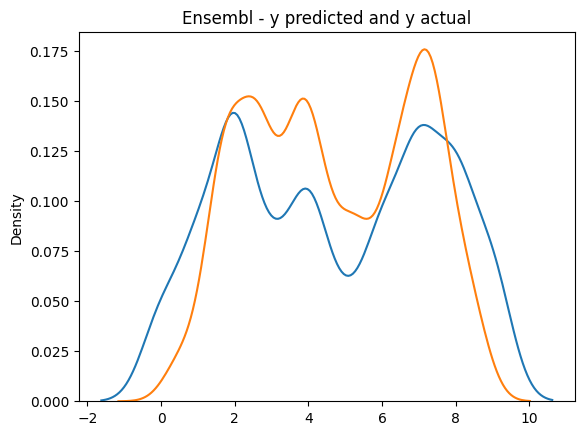

In [ ]:
plt.title("Ensembl - y predicted and y actual")
ax1=sns.distplot(Reg_y_test, hist=False)
sns.distplot(Reg_y_pred, hist=False, ax=ax1)
plt.show()

Learning Curve

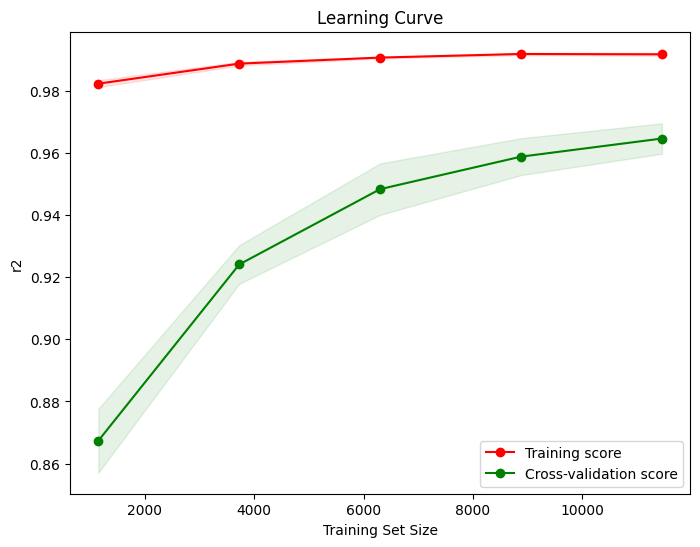

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, scoring_metric):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring_metric)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring_metric)
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

# Usage example
# estimator: your machine learning model
# X: your feature matrix
# y: your target vector
# cv: your cross-validation strategy (e.g., KFold or StratifiedKFold)
# scoring_metric: the evaluation metric to use (e.g., accuracy, precision, recall, etc.)

# Assuming you have imported and prepared your data into X and y

# Import the necessary libraries
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize your machine learning model
estimator = RandomForestRegressor()

# Plot the learning curves
plot_learning_curve(estimator, X_train, y_train, cv=5, scoring_metric='r2')